In [1]:
from sklearn import datasets
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import time

In [2]:
mnist = datasets.fetch_openml('mnist_784') 

In [3]:
index = np.random.randint(70000, size=5000)
data = [mnist.data[index], mnist.target[index]]
xtrain, xtest, ytrain, ytest = train_test_split(data[0], data[1], test_size=0.2)

In [4]:
clf = MLPClassifier(hidden_layer_sizes=(50))
clf.fit(xtrain, ytrain)
score = clf.score(xtest, ytest)

print('Precision pour hidden_layer_size = 50 : ' + str(score))

Precision pour hidden_layer_size = 50 : 0.845


In [5]:
import matplotlib.pyplot as plt

image4 = xtest[4].reshape((28, 28))
plt.imshow(image4, cmap=plt.cm.gray_r, interpolation="nearest")
plt.show() 

print('Classe image 4 : ' + ytest[4])

predict4 = clf.predict([xtest[4]])
print('Prediction classifieur : ' + str(predict4))

<Figure size 640x480 with 1 Axes>

Classe image 4 : 3
Prediction classifieur : ['3']


In [6]:
from sklearn.metrics import precision_score, recall_score, zero_one_loss

predictions = clf.predict(xtest)
score = precision_score(ytest, predictions, average='micro')

print('precision : ' + str(score))

precision : 0.845


In [7]:
precisions_test = []
precisions_train = []
list_time = []
recall_scores_test = []
recall_scores_train = []
zol_test = []
zol_train = []
times_fit = []

nb_neur = (50,)

for i in [2, 10, 20, 50, 100]:    
    clf = MLPClassifier(hidden_layer_sizes= nb_neur*i)
    
    start = time.time()
    clf.fit(xtrain, ytrain)
    times_fit.append(time.time()-start)
        
    score_test = clf.score(xtest, ytest)
    score_train = clf.score(xtrain, ytrain)
    
    precisions_test.append(score_test)
    precisions_train.append(score_train)
    
    predict_test = clf.predict(xtest)
    predict_train = clf.predict(xtrain)
    
    recall_scores_test.append(recall_score(ytest, predict_test, average='micro'))
    recall_scores_train.append(recall_score(ytrain, predict_train, average='micro'))
    
    zol_test.append(zero_one_loss(ytest, predict_test))
    zol_train.append(zero_one_loss(ytrain, predict_train))
    
    print('nombre de couches : ' + str(i) + ' precision_test : ' + str(score_test) + ' precision_train : ' + str(score_train))

nombre de couches : 2 precision_test : 0.848 precision_train : 1.0
nombre de couches : 10 precision_test : 0.912 precision_train : 1.0
nombre de couches : 20 precision_test : 0.918 precision_train : 0.99525
nombre de couches : 50 precision_test : 0.104 precision_train : 0.11175
nombre de couches : 100 precision_test : 0.104 precision_train : 0.11175


[]

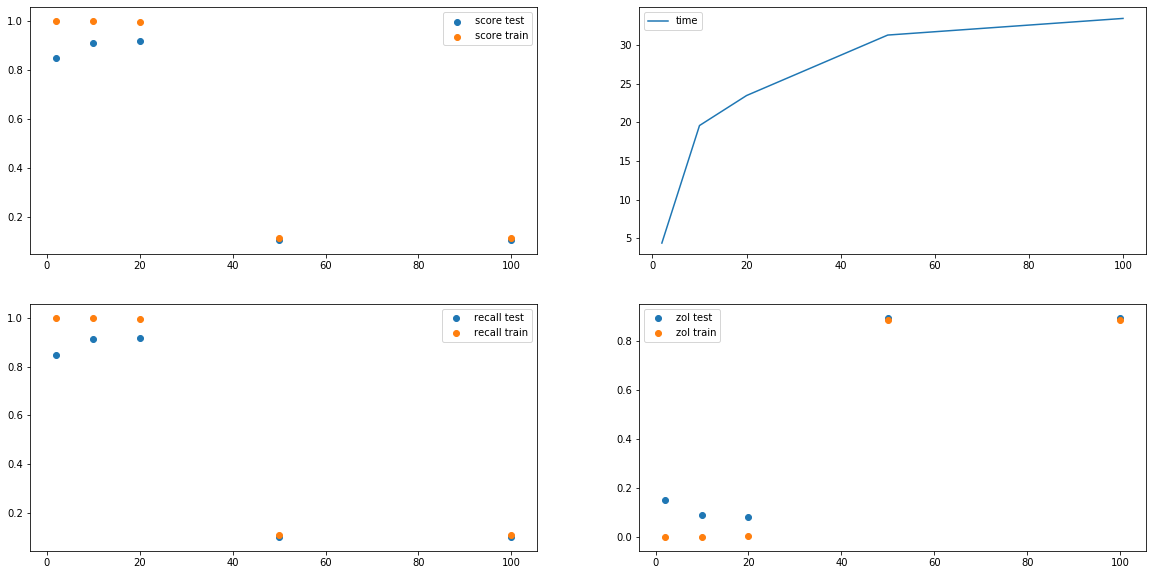

In [8]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.scatter([2, 10, 20, 50, 100], precisions_test, label='score test')
plt.scatter([2, 10, 20, 50, 100], precisions_train, label='score train')
plt.legend()
plt.subplot(222)
plt.plot([2, 10, 20, 50, 100], times_fit, label='time')
plt.legend()
plt.plot()
plt.subplot(223)
plt.scatter([2, 10, 20, 50, 100], recall_scores_test, label='recall test')
plt.scatter([2, 10, 20, 50, 100], recall_scores_train, label='recall train')
plt.legend()
plt.plot()
plt.subplot(224)
plt.scatter([2, 10, 20, 50, 100], zol_test, label='zol test')
plt.scatter([2, 10, 20, 50, 100], zol_train, label='zol train')
plt.legend()
plt.plot()

In [9]:
precisions_test = []
precisions_train = []
list_time = []
recall_scores_test = []
recall_scores_train = []
zol_test = []
zol_train = []
times_fit = []

nb_neur = 60
hidden = (nb_neur, )

list_hid = []

for i in range(10, 61, 10):
    list_hid.append(str(hidden))
    clf = MLPClassifier(hidden_layer_sizes= hidden)
    
    start = time.time()
    clf.fit(xtrain, ytrain)
    times_fit.append(time.time()-start)
        
    score_test = clf.score(xtest, ytest)
    score_train = clf.score(xtrain, ytrain)
    
    precisions_test.append(score_test)
    precisions_train.append(score_train)
    
    predict_test = clf.predict(xtest)
    predict_train = clf.predict(xtrain)
    
    recall_scores_test.append(recall_score(ytest, predict_test, average='micro'))
    recall_scores_train.append(recall_score(ytrain, predict_train, average='micro'))
    
    zol_test.append(zero_one_loss(ytest, predict_test))
    zol_train.append(zero_one_loss(ytrain, predict_train))
    
    print(hidden)
    print( 'precision_test : ' + str(score_test) + ' precision_train : ' + str(score_train))    
   
    nb_neur -= 10
    hidden += (nb_neur, )

(60,)
precision_test : 0.832 precision_train : 0.999
(60, 50)
precision_test : 0.823 precision_train : 1.0
(60, 50, 40)
precision_test : 0.841 precision_train : 1.0
(60, 50, 40, 30)
precision_test : 0.861 precision_train : 1.0
(60, 50, 40, 30, 20)
precision_test : 0.872 precision_train : 0.99925
(60, 50, 40, 30, 20, 10)
precision_test : 0.867 precision_train : 0.99925


[]

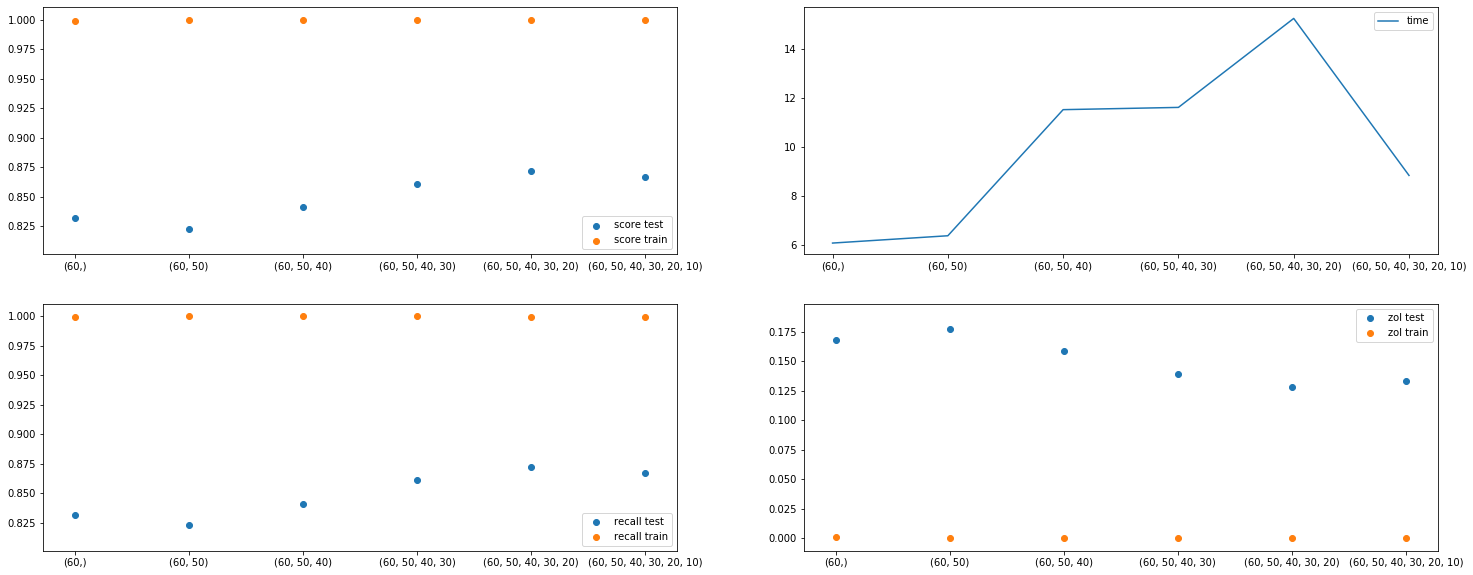

In [10]:
plt.figure(figsize=(25,10))
plt.subplot(221)
plt.scatter(list_hid, precisions_test, label='score test')
plt.scatter(list_hid, precisions_train, label='score train')
plt.legend()
plt.subplot(222)
plt.plot(list_hid, times_fit, label='time')
plt.legend()
plt.plot()
plt.subplot(223)
plt.scatter(list_hid, recall_scores_test, label='recall test')
plt.scatter(list_hid, recall_scores_train, label='recall train')
plt.legend()
plt.plot()
plt.subplot(224)
plt.scatter(list_hid, zol_test, label='zol test')
plt.scatter(list_hid, zol_train, label='zol train')
plt.legend()
plt.plot()

In [11]:
clfs = []
list_hid = []

precisions_test = []
precisions_train = []
list_time = []
recall_scores_test = []
recall_scores_train = []
zol_test = []
zol_train = []
times_fit = []

for i in range(1, 6):
    nb_hidden = np.random.randint(1, 11)
    
    neurs = ()
    
    for j in range(1, nb_hidden + 1):
        nb_neur = np.random.randint(10, 301)
        neurs += (nb_neur,)
    
    list_hid.append(str(neurs))
    
    clf_i = MLPClassifier(hidden_layer_sizes= neurs)
    clfs.append(clf_i)

for clf in clfs:
    start = time.time()
    clf.fit(xtrain, ytrain)
    times_fit.append(time.time()-start)
        
    score_test = clf.score(xtest, ytest)
    score_train = clf.score(xtrain, ytrain)
    
    precisions_test.append(score_test)
    precisions_train.append(score_train)
    
    predict_test = clf.predict(xtest)
    predict_train = clf.predict(xtrain)
    
    recall_scores_test.append(recall_score(ytest, predict_test, average='micro'))
    recall_scores_train.append(recall_score(ytrain, predict_train, average='micro'))
    
    zol_test.append(zero_one_loss(ytest, predict_test))
    zol_train.append(zero_one_loss(ytrain, predict_train))
    
    print(clf.hidden_layer_sizes)
    print('temps d\'apprentissage : ' + str(times_fit[-1]) + ' score_test : ' + str(score_test) + ' score_train: ' + str(score_train))

(22,)
temps d'apprentissage : 7.620622634887695 score_test : 0.849 score_train: 0.911
(26, 107, 249, 185, 280, 33)
temps d'apprentissage : 18.42784547805786 score_test : 0.888 score_train: 0.99975
(85, 190, 247, 150, 176, 29)
temps d'apprentissage : 14.035151243209839 score_test : 0.898 score_train: 1.0
(20, 195, 256, 225, 163, 58)
temps d'apprentissage : 17.40638041496277 score_test : 0.894 score_train: 0.99725
(199, 281, 249, 86, 252, 48, 231, 287)
temps d'apprentissage : 27.206124544143677 score_test : 0.939 score_train: 1.0


[]

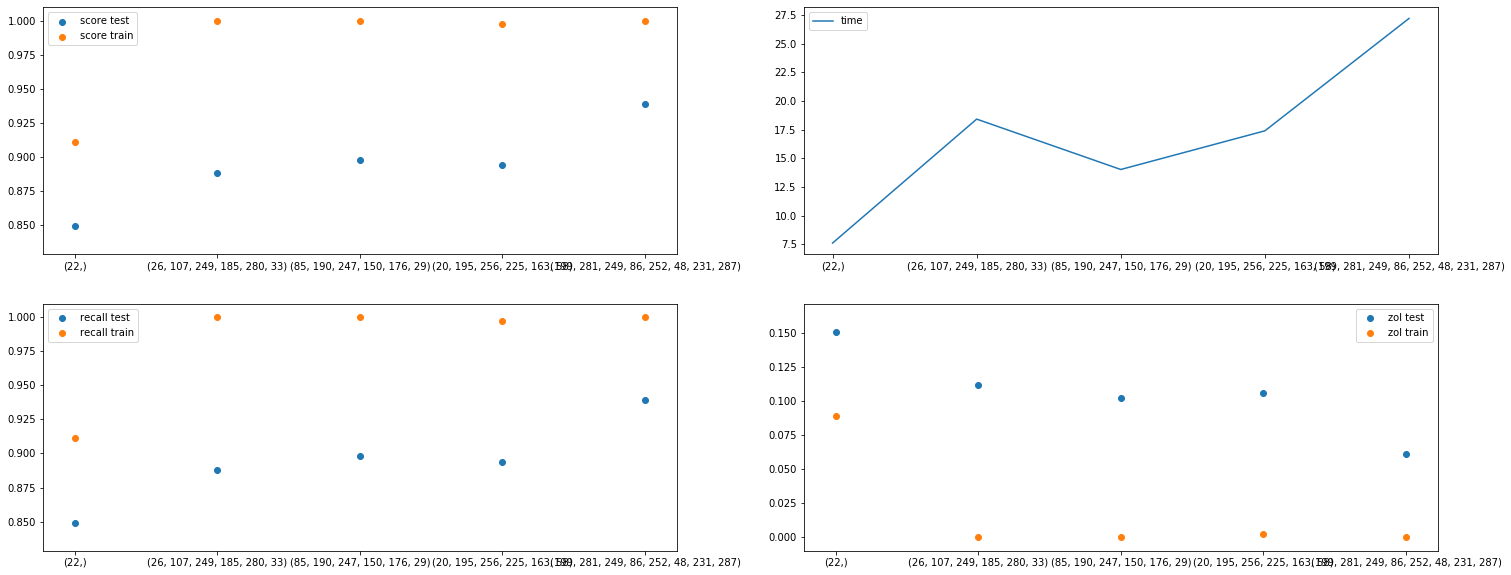

In [12]:
plt.figure(figsize=(25,10))
plt.subplot(221)
plt.scatter(list_hid, precisions_test, label='score test')
plt.scatter(list_hid, precisions_train, label='score train')
plt.legend()
plt.subplot(222)
plt.plot(list_hid, times_fit, label='time')
plt.legend()
plt.plot()
plt.subplot(223)
plt.scatter(list_hid, recall_scores_test, label='recall test')
plt.scatter(list_hid, recall_scores_train, label='recall train')
plt.legend()
plt.plot()
plt.subplot(224)
plt.scatter(list_hid, zol_test, label='zol test')
plt.scatter(list_hid, zol_train, label='zol train')
plt.legend()
plt.plot()

In [13]:
precisions_test = []
precisions_train = []
list_time = []
recall_scores_test = []
recall_scores_train = []
zol_test = []
zol_train = []
times_fit = []

for s in ['lbfgs', 'sgd', 'adam']:
    clf = MLPClassifier(solver=s)
    start = time.time()
    clf.fit(xtrain, ytrain)
    times_fit.append(time.time()-start)
        
    score_test = clf.score(xtest, ytest)
    score_train = clf.score(xtrain, ytrain)
    
    precisions_test.append(score_test)
    precisions_train.append(score_train)
    
    predict_test = clf.predict(xtest)
    predict_train = clf.predict(xtrain)
    
    recall_scores_test.append(recall_score(ytest, predict_test, average='micro'))
    recall_scores_train.append(recall_score(ytrain, predict_train, average='micro'))
    
    zol_test.append(zero_one_loss(ytest, predict_test))
    zol_train.append(zero_one_loss(ytrain, predict_train))
    
    print('solver : ' + s + ' precision_test : ' + str(score_test) + ' precision_train : ' + str(score_train))

solver : lbfgs precision_test : 0.418 precision_train : 0.4415


c:\programdata\miniconda3\envs\dask_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


solver : sgd precision_test : 0.876 precision_train : 0.96225
solver : adam precision_test : 0.884 precision_train : 1.0


[]

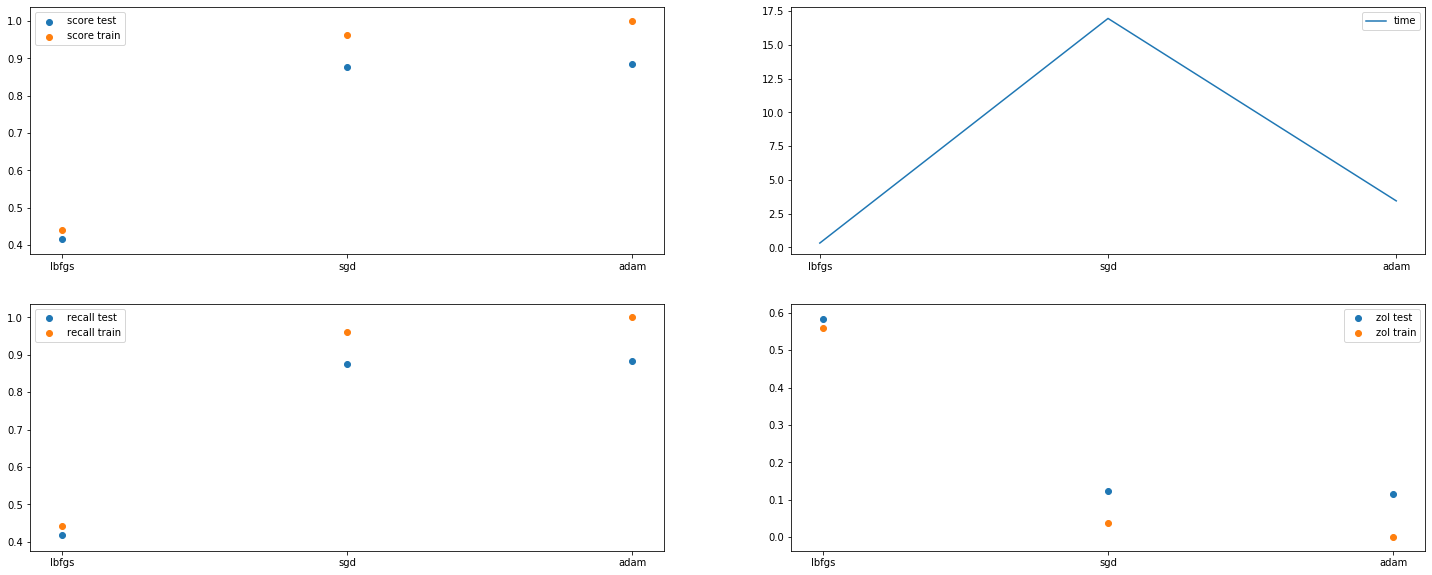

In [14]:
plt.figure(figsize=(25,10))
plt.subplot(221)
plt.scatter(['lbfgs', 'sgd', 'adam'], precisions_test, label='score test')
plt.scatter(['lbfgs', 'sgd', 'adam'], precisions_train, label='score train')
plt.legend()
plt.subplot(222)
plt.plot(['lbfgs', 'sgd', 'adam'], times_fit, label='time')
plt.legend()
plt.plot()
plt.subplot(223)
plt.scatter(['lbfgs', 'sgd', 'adam'], recall_scores_test, label='recall test')
plt.scatter(['lbfgs', 'sgd', 'adam'], recall_scores_train, label='recall train')
plt.legend()
plt.plot()
plt.subplot(224)
plt.scatter(['lbfgs', 'sgd', 'adam'], zol_test, label='zol test')
plt.scatter(['lbfgs', 'sgd', 'adam'], zol_train, label='zol train')
plt.legend()
plt.plot()

In [15]:
precisions_test = []
precisions_train = []
list_time = []
recall_scores_test = []
recall_scores_train = []
zol_test = []
zol_train = []
times_fit = []

for fct in ['identity', 'logistic', 'tanh', 'relu']:
    clf = MLPClassifier(hidden_layer_sizes=(50, 30, 10), activation=fct)
    start = time.time()
    clf.fit(xtrain, ytrain)
    times_fit.append(time.time()-start)
        
    score_test = clf.score(xtest, ytest)
    score_train = clf.score(xtrain, ytrain)
    
    precisions_test.append(score_test)
    precisions_train.append(score_train)
    
    predict_test = clf.predict(xtest)
    predict_train = clf.predict(xtrain)
    
    recall_scores_test.append(recall_score(ytest, predict_test, average='micro'))
    recall_scores_train.append(recall_score(ytrain, predict_train, average='micro'))
    
    zol_test.append(zero_one_loss(ytest, predict_test))
    zol_train.append(zero_one_loss(ytrain, predict_train))
    
    print('activation : ' + fct + ' precision_test : ' + str(score_test) + ' precision_train : ' + str(score_train))

activation : identity precision_test : 0.849 precision_train : 0.9725
activation : logistic precision_test : 0.857 precision_train : 0.946
activation : tanh precision_test : 0.876 precision_train : 0.91575
activation : relu precision_test : 0.877 precision_train : 0.96725


[]

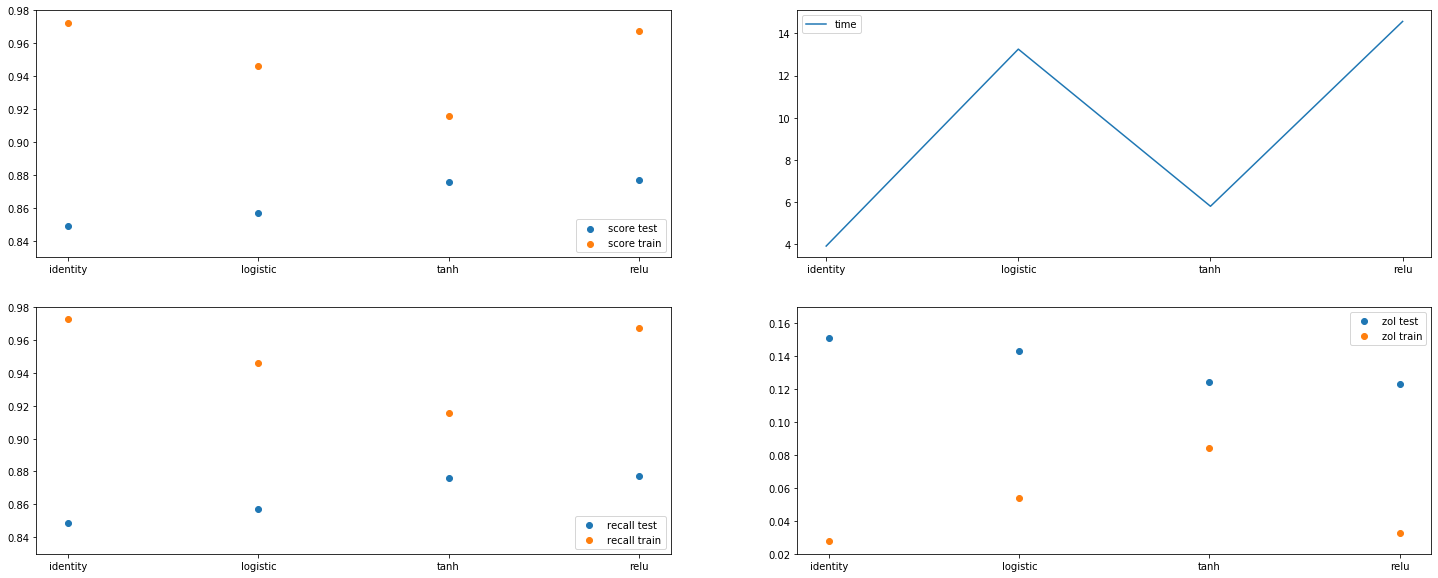

In [16]:
plt.figure(figsize=(25,10))
plt.subplot(221)
plt.scatter(['identity', 'logistic', 'tanh', 'relu'], precisions_test, label='score test')
plt.scatter(['identity', 'logistic', 'tanh', 'relu'], precisions_train, label='score train')
plt.legend()
plt.subplot(222)
plt.plot(['identity', 'logistic', 'tanh', 'relu'], times_fit, label='time')
plt.legend()
plt.plot()
plt.subplot(223)
plt.scatter(['identity', 'logistic', 'tanh', 'relu'], recall_scores_test, label='recall test')
plt.scatter(['identity', 'logistic', 'tanh', 'relu'], recall_scores_train, label='recall train')
plt.legend()
plt.plot()
plt.subplot(224)
plt.scatter(['identity', 'logistic', 'tanh', 'relu'], zol_test, label='zol test')
plt.scatter(['identity', 'logistic', 'tanh', 'relu'], zol_train, label='zol train')
plt.legend()
plt.plot()

In [17]:
alpha = 1
list_a = []
precisions_test = []
precisions_train = []
list_time = []
recall_test = []
recall_train = []
zol_test = []
zol_train = []

for i in range(1, 5):
    alpha = alpha/10
    list_a.append(str(alpha))
    
    clf = MLPClassifier(hidden_layer_sizes=(50, 30, 10), alpha=alpha)
    start_time = time.time()
    clf.fit(xtrain, ytrain)
    list_time.append(time.time() - start_time)
    
    score_test = clf.score(xtest, ytest)
    precisions_test.append(score_test)
    
    score_train = clf.score(xtrain, ytrain)
    precisions_train.append(score_train)
    
    predict_test = clf.predict(xtest)
    recall_test.append(recall_score(ytest, predict_test, average='micro'))
    zol_test.append(zero_one_loss(ytest, predict_test))
    
    predict_train = clf.predict(xtrain)
    recall_train.append(recall_score(ytrain, predict_train, average='micro'))
    zol_train.append(zero_one_loss(ytrain, predict_train))
    
    print('alpha : ' + str(alpha) + ' precision_test : ' + str(score_test) + ' precision_train : ' + str(score_train))

alpha : 0.1 precision_test : 0.861 precision_train : 0.965
alpha : 0.01 precision_test : 0.86 precision_train : 0.98225


c:\programdata\miniconda3\envs\dask_env\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


alpha : 0.001 precision_test : 0.861 precision_train : 0.95375
alpha : 0.0001 precision_test : 0.863 precision_train : 0.97525


[]

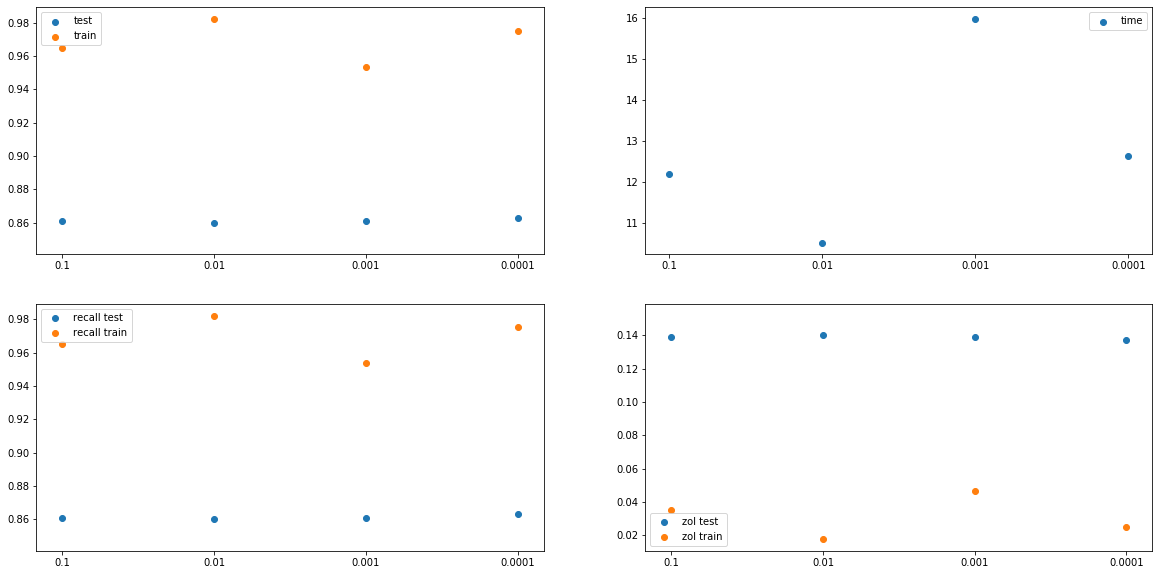

In [18]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.scatter(list_a, precisions_test, label='test')
plt.scatter(list_a, precisions_train, label='train')
plt.legend()
plt.subplot(222)
plt.scatter(list_a, list_time, label='time')
plt.legend()
plt.plot()
plt.subplot(223)
plt.scatter(list_a, recall_test, label='recall test')
plt.scatter(list_a, recall_train, label='recall train')
plt.legend()
plt.plot()
plt.subplot(224)
plt.scatter(list_a, zol_test, label='zol test')
plt.scatter(list_a, zol_train, label='zol train')
plt.legend()
plt.plot()

In [ ]:
best_alpha = 0.0001
best_activation = 'relu'
best_solver = 'adam'
best_hidden = (200, 150, 100, 50, 20)

best_clf = MLPClassifier(hidden_layer_sizes=best_hidden,
                        solver=best_solver,
                        activation=best_activation,
                        alpha=best_alpha)

best_clf.fit(xtrain, ytrain)
print('score_test : ' + str(best_clf.score(xtest, ytest)))
print('score_train : ' + str(best_clf.score(xtrain, ytrain)))